In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [2]:
def findd(df):
    index = df.find(',')
    if index == -1:
        index = 0
    else:
        index = index+2
    return index

def finddd(df):
    index1 = df.find('+')
    index2 = df.find('-')
    return max(index1, index2)

def fin(df):
    index = df.find(':')
    return index

def period(x):
  if x<11:
    return 'start'
  elif x<21:
    return 'middle'
  else:
    return 'end'

def determining_week(x):
  index = x.find('/')
  hour = int(x[:index])
  weekday = int(x[index+1:])
  if hour >= 9 and hour < 17 and weekday != 0 and weekday != 6:
    return 'weekday'
  elif hour >= 9 and hour < 17 and (weekday == 0 or weekday == 6):
    return 'weekend'
  else:
    return 'all week'

def determining_day(x):
  index = x.find('/')
  hour = int(x[:index])
  weekday = int(x[index+1:])
  if hour >= 9 and hour < 17 and weekday != 0 and weekday != 6:
    return 'working hours'
  elif hour >= 9 and hour < 17 and (weekday == 0 or weekday == 6):
    return 'weekend day'
  elif hour >= 17 and hour <= 23:
    return 'evening'
  elif hour <= 5:
    return 'night'
  else:
    return 'morning'

def feature_engineering(train_df):

  train_df['date'] = train_df['date'].apply(lambda x: x.replace("  "," ")) #some rows have extra space

  train_df['day'] = train_df['date'].apply(lambda x: x[findd(x):findd(x)+2].replace(" ", ""))
  train_df['day'] = train_df['day'].apply(lambda x: '0'+x if len(x)==1 else x) # to be used for datetime

  train_df['month'] = train_df['date'].apply(lambda x: x[findd(x)+2:findd(x)+6].replace(" ", ""))

  train_df['year'] = train_df['date'].apply(lambda x: x[findd(x)+6:findd(x)+11].replace(" ", ""))

  train_df['hour'] = train_df['date'].apply(lambda x: x[findd(x)+11:fin(x)].replace(" ", ""))

  train_df['minute'] = train_df['date'].apply(lambda x: x[fin(x)+1:fin(x)+3].replace(" ", ""))

  train_df['second'] = train_df['date'].apply(lambda x: x[fin(x)+4:fin(x)+6].replace(" ", ""))

  train_df['GMT'] = train_df['date'].apply(lambda x: x[finddd(x):].replace(" ", ""))

  return train_df

def month_cleaner (x):
    try:
        x = datetime.strptime(x,'%b').strftime('%m')
        return(x)
    except:
        return (-1)
def week_day_cleaner (x):
    try:
        x = datetime.strptime(x, '%d-%b-%Y').strftime('%w')
        return(x)
    except:
        return (0)
    
def hour_cleaner (x):
    try:
        if x < 12:
            x = 'AM'  
        else: x = 'PM'
        return(x)
    except:
        return (0)
def day_of_week_cleaner(x):
    try:return(determining_week(x))
    except:return(0)
    
def time_of_day_cleaner(x):
    try:return(determining_day(x))
    except:return(0)

def feature_engineering_cleaning(train_df):
    # Feature Engineering after cleaning:
  # Example: maybe if promotion more images will be used than characters so proportion of char in body will be smaller

  train_df['month_number'] = train_df['month'].apply(month_cleaner)
  
  train_df['weekday'] = (train_df['day'] +'-'+ train_df['month'] +'-'+ train_df['year']).apply(week_day_cleaner)
  # Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.

  train_df['period_month'] = train_df['day'].astype(int).apply(lambda x: period(x))

  train_df['period_time'] = train_df['hour'].astype(int).apply(hour_cleaner)

  train_df['timezone'] = train_df['GMT'].apply(lambda x: x[:5]).apply(lambda x: '+0000' if len(x) != 5 else x).apply(lambda x: '+0000' if x == '-0000' else x)

  train_df['time'] = train_df['hour'].astype('str') +'/'+ train_df['weekday'].astype('str')

  train_df['day_of_week'] = train_df['time'].apply(day_of_week_cleaner)
  train_df['time_of_day'] = train_df['time'].apply(time_of_day_cleaner)

  train_df.drop('time',axis= 1, inplace=True)

  train_df = data_cleaner(train_df)

  train_df['chars_in_subject'] = train_df['chars_in_subject'].astype(int)
  train_df['chars_in_body'] = train_df['chars_in_body'].astype(int)
  train_df['hour'] = train_df['hour'].astype(int)
  train_df['month_number'] = train_df['month_number'].astype(int)
  train_df['weekday'] = train_df['weekday'].astype(int)


  train_df['chars_in_subject_proportion'] = train_df['chars_in_subject'] / (train_df['chars_in_subject'] + train_df['chars_in_body'])
  train_df['chars_in_body_proportion'] = train_df['chars_in_body'] / (train_df['chars_in_subject'] + train_df['chars_in_body'])

  train_df['urls_images_proportion'] = (train_df['urls'] + train_df['images'])/ (train_df['chars_in_body'] + train_df['urls'] + train_df['images'])

  train_df['urls_proportion_body'] = train_df['urls']/ (train_df['chars_in_body'] + 1)

  train_df['images_proportion_body'] = train_df['images']/ (train_df['chars_in_body'] + 1)

  train_df['chars_in_subject_proportion'] = train_df['chars_in_subject_proportion']

  train_df['chars_in_body_proportion'] = train_df['chars_in_body_proportion']

  train_df['urls_images_proportion'] = train_df['urls_images_proportion']

  train_df['urls_proportion_body'] = train_df['urls_proportion_body']

  train_df['images_proportion_body'] = train_df['images_proportion_body']

  return train_df

In [ ]:
hour_cleaner(10)

'AM'

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv') 

In [ ]:
def data_cleaner (df, chars_in_subject = train_df['chars_in_subject'].median() ):
    
    df['org'] = df['org'].fillna('org_undefinded')
    df['tld'] = df['tld'].fillna('tld_undefinded')
    df['mail_type'] = df['mail_type'].fillna('mail_type_undefinded').apply(lambda x:x.lower())
    df['chars_in_subject'] = df['chars_in_subject'].fillna(chars_in_subject)
    df.drop([ 'date', 'GMT', 'day', 'month', 'year', 'minute', 'second'],axis= 1, inplace=True)
    return (df)

def invert_str(x):
    return(x[::-1])

In [ ]:
# One hot encoding the mail_type


def ohe_mail_type (df):
    unique_mail_types = df['mail_type'].apply(lambda x: x.split('/')).explode().unique()
    for mt in unique_mail_types:
        df[f'mail_type_{mt}'] = df['mail_type'].apply(lambda x: 1 if mt in x else 0)
    df.drop('mail_type',axis =1,inplace = True)
    return(df)


def ohe_others(df):

  unique_period_month = df['period_month'].unique()
  for mt in unique_period_month:
      df[f'period_month_{mt}'] = df['period_month'].apply(lambda x: 1 if mt in x else 0)
  df.drop('period_month',axis= 1, inplace=True)

  unique_period_time = df['period_time'].unique()
  for mt in unique_period_time:
      df[f'period_time_{mt}'] = df['period_time'].apply(lambda x: 1 if mt in x else 0)
  df.drop('period_time',axis= 1, inplace=True)

  unique_day_of_week = df['day_of_week'].unique()
  for mt in unique_day_of_week:
      df[f'day_of_week_{mt}'] = df['day_of_week'].apply(lambda x: 1 if mt in x else 0)
  df.drop('day_of_week',axis= 1, inplace=True)

  unique_time_of_day = df['time_of_day'].unique()
  for mt in unique_time_of_day:
      df[f'time_of_day_{mt}'] = df['time_of_day'].apply(lambda x: 1 if mt in x else 0)
  df.drop('time_of_day',axis= 1, inplace=True)

  return df

In [ ]:
# Splitting tld
def tld_split(df):
    df['tld'].apply(lambda x:x.split('.')[0]).unique()
    df['tld_back'] = df['tld'].apply(lambda x: 'undefined_tld_back' if '.' not in x else invert_str(invert_str(x).split('.')[0].lower()))
    df['tld_front'] = df['tld'].apply(lambda x: 'undefined_tld_front' if '.' not in x else x.split('.')[0].lower())
    df.drop(['tld'], axis = 1, inplace = True)
    top_10_tld_back = pd.DataFrame(df[['tld_back']].groupby('tld_back').size()).sort_values(0,ascending=False).head(20).index.tolist()
    df['tld_back'] = df['tld_back'].apply(lambda x: x if x in top_10_tld_back else 'tld_back_Uncommon')
    for bk in df['tld_back'].unique().tolist():
        df[f'tld_back_{bk}'] = df['tld_back'].apply(lambda x: 1 if x == bk else 0 )
    df.drop(['tld_back'], axis = 1, inplace = True)
    return(df)

In [ ]:
test_df['label'] = 'test_df'
joint_df = train_df.append(test_df, ignore_index=False) 

C:\Users\arind\AppData\Local\Temp\ipykernel_35672\1710371832.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_df = train_df.append(test_df, ignore_index=False)


In [ ]:
print(joint_df.shape)
print(train_df.shape)
print(test_df.shape)
# train_df = 

(114541, 14)
(80176, 14)
(34365, 14)


In [ ]:
# train_df = feature_engineering(train_df)
# train_df = train_df[train_df['year'] != '131']
# train_df = train_df[train_df['month'] != '-MAR']
# train_df = feature_engineering_cleaning(train_df)
# train_df = ohe_mail_type(train_df)
# train_df = ohe_others(train_df)
# train_df = tld_split(train_df)

In [ ]:
joint_df = feature_engineering(joint_df)
joint_df = feature_engineering_cleaning(joint_df)
joint_df = ohe_mail_type(joint_df)
joint_df = ohe_others(joint_df)
joint_df = tld_split(joint_df)

In [ ]:
# print(joint_df.columns)
# joint_df.to_csv('joint_chk.csv')
joint_df['chars_in_subject_proportion'] 

0        0.000612
1        0.034876
2        0.001390
3        0.000024
4        0.020383
           ...   
34360    0.001502
34361    0.002141
34362    0.007620
34363    0.014454
34364    0.004410
Name: chars_in_subject_proportion, Length: 114541, dtype: float64

In [ ]:
le_org = preprocessing.LabelEncoder()
joint_df['timezone'] = le_org.fit_transform(joint_df['timezone'])

In [ ]:
# train_df['timezone'] = le_org.transform(train_df['timezone'])

In [ ]:
le_tldfront = preprocessing.LabelEncoder()
joint_df['tld_front'] = le_tldfront.fit_transform(joint_df['tld_front'])

In [ ]:
right_df = pd.read_csv('final_label_probab_df.csv')
joint_df = joint_df.merge(right_df, on='org', how='left', indicator=False)

In [ ]:

# test_df = feature_engineering(test_df)

# # ONLY FOR TRAINING SET
# # A date was 13 instead of 2013
# test_df['year'] = test_df['year'].apply(lambda x: x[1:] if len(x)==5 else x)
# test_df['month'] = test_df['month'].apply(lambda x: 'Mar' if len(x)!=3 else x)
# test_df = feature_engineering_cleaning(test_df)

In [ ]:
# test_df = ohe_mail_type(test_df)
# test_df = ohe_others(test_df)
# test_df = tld_split(test_df)

In [ ]:
# le_org = preprocessing.LabelEncoder()
# test_df['timezone'] = le_org.transform(test_df['timezone'])

# le_tldfront = preprocessing.LabelEncoder()
# test_df['tld_front'] = le_tldfront.transform(test_df['tld_front'])

In [ ]:
# right_df = pd.read_csv('final_label_probab_df.csv')
# test_df = test_df.merge(right_df, on='org', how='left', indicator=False)

In [ ]:
le_org = preprocessing.LabelEncoder()
joint_df['org'] = le_tldfront.fit_transform(joint_df['org'])

In [ ]:
df_dtypes = joint_df.dtypes.to_frame('dtype')
df_dtypes[df_dtypes['dtype'] == 'object']

,dtype
label,object


In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body', 'hour', 'month_number', 'weekday', 'timezone']
features = joint_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
joint_df[col_names] = features
# scaler = StandardScaler()
# joint_df[[]] = scaler.fit_transform(joint_df[['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body', 'hour', 'month_number', 'weekday', 'timezone']])

In [ ]:
for col in joint_df.drop('label',axis=1).columns:
    if joint_df[col].astype('int').max()>5:
        print(col,joint_df[col].astype('int').max())
# joint_df

Unnamed: 0 80175
org 1082
ccs 54
images 189
urls 183
chars_in_subject 16
chars_in_body 38
tld_front 238


In [ ]:
joint_df[joint_df['label'] == 'test_df'].drop('label',axis=1).to_csv('test_final_scaled.csv',index=False)
joint_df[joint_df['label'] != 'test_df'].to_csv('train_final_scaled.csv',index=False)

In [ ]:
train_df.shape

(80176, 14)

In [16]:
test_df.head()

,org,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,hour,...,tld_back_jp,tld_back_io,label_0_probab,label_1_probab,label_2_probab,label_3_probab,label_4_probab,label_5_probab,label_6_probab,label_7_probab
0,486,-0.146616,0,-0.021021,-0.192681,1,0,-0.933641,-0.101712,0.562988,...,0,0,0.006318,0.556185,0.000552,0.436093,0.000401,0.000451,0.0,0.000000
1,690,-0.146616,0,-0.005125,0.122563,1,0,-0.073926,-0.086785,1.395638,...,0,0,0.379592,0.493878,0.012245,0.000000,0.000000,0.000000,0.0,0.114286
2,486,0.159858,0,-0.021021,-0.294922,1,0,-0.815059,-0.103180,0.396458,...,0,0,0.006318,0.556185,0.000552,0.436093,0.000401,0.000451,0.0,0.000000
3,983,-0.146616,0,0.008500,0.131083,1,0,0.548626,-0.063833,0.063398,...,0,0,0.032432,0.499099,0.468468,0.000000,0.000000,0.000000,0.0,0.000000
4,432,-0.146616,0,0.019854,0.352605,1,0,-0.400025,-0.092192,-1.102311,...,0,0,0.756041,0.238303,0.003342,0.000000,0.002314,0.000000,0.0,0.000000


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# train_df = train_df.drop('label',axis = 1)
x_pca = train_df.loc[:, train_df.columns].values
# y = df.loc[:,['target']].values
x_pca = StandardScaler().fit_transform(x_pca)
pd.DataFrame(data = x_pca, columns = train_df.columns).head()


pca = PCA(n_components=0.73)
principalComponents = pca.fit_transform(x_pca)
ppca = pca.n_components_
print(ppca)
pcacol = []
for t in range(1,ppca+1):
    temp = 'principal component ' + str(t)
    pcacol.append(temp)

principalDf = pd.DataFrame(data = principalComponents
              , columns = pcacol)



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    principalDf, train_df['label'], test_size=0.2, random_state=42)

35


In [22]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33
0,-1.043412,0.961099,0.941625,-2.276636,0.748209,-0.453272,1.044446,0.273589,0.673170,-0.696511,...,-0.453266,-0.265890,-0.295411,0.241292,-0.096830,-0.048070,0.071539,0.052884,0.012943,-0.044214
1,0.246085,0.462645,1.021581,-2.071491,0.289755,-0.884023,2.128031,0.284626,-1.595562,1.355642,...,0.873825,0.566063,0.278558,-0.474522,-0.396451,0.028793,0.068155,0.013073,-0.068918,0.065296
2,1.695876,-3.676740,0.548873,2.882079,-0.738586,-0.210278,-2.255958,-0.354720,1.295157,-0.567384,...,-0.276867,-0.091598,0.000345,-0.095337,-0.071970,-0.010257,-0.019505,0.048262,0.032402,0.022249
3,-0.964508,-0.447166,-1.080401,-2.577178,-2.193856,-0.109489,-0.868073,-0.737274,-0.629839,1.597107,...,-0.141477,0.319482,-0.155512,-0.018154,0.356844,-0.046408,-0.055703,-0.024310,-0.005706,-0.070381
4,1.020973,0.570356,2.429172,-1.908842,1.309076,-0.731500,2.216834,-0.269182,2.558129,0.191114,...,-0.578989,-0.465541,-0.382392,-0.035795,0.165134,-0.147883,-0.018837,0.003330,-0.001489,-0.015208


In [19]:
l = ['label_2_probab', 'label_0_probab', 'label_1_probab', 'label_3_probab', 'chars_in_subject',               
     'label_7_probab', 'chars_in_subject_proportion', 'urls_proportion_body', 'timezone', 'urls_images_proportion', 'mail_type_multipart',           
     'images_proportion_body', 'ccs', 'images', 'month_number']
for x in train_df.columns:
  print(x)

# label_2_probab                 21.004986
# label_0_probab                 18.832686
# label_1_probab                 12.498235
# label_3_probab                  9.513214
# chars_in_subject                5.347570
# label_7_probab                  5.342925
# chars_in_subject_proportion     4.297976
# urls_proportion_body            4.004452
# timezone                        3.036603
# urls_images_proportion          2.521608
# mail_type_multipart             2.375329
# images_proportion_body          1.602942
# ccs                             1.545547
# images                          1.324021
# month_number                    1.000794
# mail_type_alternative           0.968076
# salutations                     0.934407
# org                             0.764302
# chars_in_body_proportion        0.706015
# label_4_probab                  0.520274

org
ccs
bcced
images
urls
salutations
designation
chars_in_subject
chars_in_body
label
hour
month_number
weekday
timezone
chars_in_subject_proportion
chars_in_body_proportion
urls_images_proportion
urls_proportion_body
images_proportion_body
mail_type_multipart
mail_type_alternative
mail_type_text
mail_type_html
mail_type_mixed
mail_type_related
mail_type_plain
mail_type_mail_type_undefinded
mail_type_html 
mail_type_signed
mail_type_report
mail_type_calendar
mail_type_idm
period_month_start
period_month_middle
period_month_end
period_time_AM
period_time_PM
day_of_week_weekday
day_of_week_all week
day_of_week_weekend
time_of_day_working hours
time_of_day_evening
time_of_day_morning
time_of_day_weekend day
time_of_day_night
tld_front
tld_back_in
tld_back_com
tld_back_undefined_tld_back
tld_back_org
tld_back_me
tld_back_my
tld_back_info
tld_back_fr
tld_back_es
tld_back_de
tld_back_news
tld_back_tld_back_Uncommon
tld_back_co
tld_back_int
tld_back_edu
tld_back_uk
tld_back_so
tld_back_mil
t

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

train_df = pd.read_csv('train_final_scaled.csv')
test_df = pd.read_csv('test_final_scaled.csv') 

train_df.drop('Unnamed: 0',axis= 1, inplace=True)
test_df.drop('Unnamed: 0',axis= 1, inplace=True)

In [1]:
!pip install catboost

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop(['label'],axis = 1), train_df['label'], test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(
#     train_df[['label_2_probab', 'label_0_probab', 'label_1_probab', 'label_3_probab', 'chars_in_subject',               
#      'label_7_probab']], train_df['label'], test_size=0.2, random_state=42)

0:	learn: 1.8029064	total: 806ms	remaining: 10.5s
1:	learn: 1.6229717	total: 1.55s	remaining: 9.29s
2:	learn: 1.4886248	total: 2.29s	remaining: 8.39s
3:	learn: 1.3841024	total: 3.02s	remaining: 7.55s
4:	learn: 1.3002689	total: 3.77s	remaining: 6.78s
5:	learn: 1.2300905	total: 4.51s	remaining: 6.01s
6:	learn: 1.1725323	total: 5.25s	remaining: 5.25s
7:	learn: 1.1231844	total: 6.45s	remaining: 4.83s
8:	learn: 1.0792839	total: 7.84s	remaining: 4.36s
9:	learn: 1.0415173	total: 9.33s	remaining: 3.73s
10:	learn: 1.0097936	total: 10.8s	remaining: 2.94s
11:	learn: 0.9811837	total: 12.1s	remaining: 2.02s
12:	learn: 0.9560571	total: 12.9s	remaining: 992ms
13:	learn: 0.9344940	total: 13.6s	remaining: 0us
Acuracy of the CatBoost:0.5923547019206785
label_2_probab                 21.004986
label_0_probab                 18.832686
label_1_probab                 12.498235
label_3_probab                  9.513214
chars_in_subject                5.347570
label_7_probab                  5.342925
chars_in_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


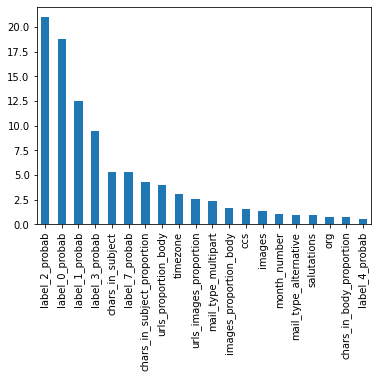

In [12]:
# lda = LDA(n_components=7)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# lasso = Lasso(alpha=1.0)

# X_train = lasso.fit_transform(X_train, y_train)

# X_test = lda.transform(X_test)

# model = CatBoostClassifier(loss_function='MultiClass')

# grid = {'learning_rate': [0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
#         'depth': [4, 6, 8, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9],
#         'iterations': [10,20,30,40,50], 'one_hot_max_size':[500,600,700,800,900,1000]}

# grid_search_result = model.grid_search(grid,
#                                        X=X_train,
#                                        y=y_train,
#                                        plot=True)
# print(grid_search_result)

model = CatBoostClassifier(iterations = 14, loss_function='MultiClass', depth=10, learning_rate = 0.1,
                           l2_leaf_reg = 1, one_hot_max_size = 1000)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Acuracy of the CatBoost:{accuracy_score(y_test, pred)}')
classification_report(y_test, pred)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar')

print(feat_importances.nlargest(20))

In [42]:
# lda = LDA(n_components=7)
# X_train = lda.fit_transform(train_df.drop(['label'],axis = 1), train_df['label'])
# X_test = lda.transform(test_df)

model = CatBoostClassifier(iterations = 40, loss_function='MultiClass', depth=10, learning_rate = 0.1,
                           l2_leaf_reg = 1, one_hot_max_size = 1000)
model.fit(train_df[['label_2_probab', 'label_0_probab', 'label_1_probab', 'label_3_probab', 'chars_in_subject',               
     'label_7_probab', 'chars_in_subject_proportion', 'urls_proportion_body', 'timezone', 'urls_images_proportion', 'mail_type_multipart',           
     'images_proportion_body', 'ccs', 'images', 'month_number']], train_df['label'])

pred = model.predict(test_df)

0:	learn: 1.8007046	total: 320ms	remaining: 12.5s
1:	learn: 1.6188728	total: 628ms	remaining: 11.9s
2:	learn: 1.4844302	total: 921ms	remaining: 11.4s
3:	learn: 1.3789199	total: 1.21s	remaining: 10.9s
4:	learn: 1.2952620	total: 1.51s	remaining: 10.6s
5:	learn: 1.2257700	total: 1.81s	remaining: 10.3s
6:	learn: 1.1672858	total: 2.11s	remaining: 9.94s
7:	learn: 1.1174282	total: 2.4s	remaining: 9.59s
8:	learn: 1.0738481	total: 2.7s	remaining: 9.29s
9:	learn: 1.0367913	total: 2.98s	remaining: 8.95s
10:	learn: 1.0050583	total: 3.27s	remaining: 8.62s
11:	learn: 0.9767969	total: 3.56s	remaining: 8.32s
12:	learn: 0.9526749	total: 3.86s	remaining: 8.03s
13:	learn: 0.9299516	total: 4.15s	remaining: 7.71s
14:	learn: 0.9110693	total: 4.44s	remaining: 7.39s
15:	learn: 0.8928897	total: 4.73s	remaining: 7.09s
16:	learn: 0.8775742	total: 5.02s	remaining: 6.79s
17:	learn: 0.8633754	total: 5.3s	remaining: 6.48s
18:	learn: 0.8503059	total: 5.59s	remaining: 6.17s
19:	learn: 0.8394600	total: 5.88s	remaining:

In [23]:
neigh = KNeighborsClassifier(n_neighbors=18)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print(f'Acuracy of the KNN18:{accuracy_score(y_test, pred)}')
confusion_matrix(y_test, pred)
classification_report(y_test, pred)
#precision_score(y_test, pred)
#recall_score(y_test, pred)

Acuracy of the KNN18:0.7403966076328261


'              precision    recall  f1-score   support\n\n           0       0.69      0.72      0.70      3680\n           1       0.72      0.77      0.75      7429\n           2       0.59      0.49      0.53      1719\n           3       0.89      0.82      0.85      2109\n           4       0.25      0.06      0.10        50\n           5       0.69      0.35      0.46        26\n           6       0.58      0.35      0.44        31\n           7       1.00      0.95      0.97       992\n\n    accuracy                           0.74     16036\n   macro avg       0.68      0.56      0.60     16036\nweighted avg       0.74      0.74      0.74     16036\n'

In [48]:
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


parameters = {'n_neighbors':list(range(19,25))}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
pred = clf.predict(X_test)
print(f'Acuracy of the KNN{clf.best_params_}:{accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))

{'n_neighbors': 23}
Acuracy of the KNN{'n_neighbors': 23}:0.5611748565727114
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      3680
           1       0.56      0.54      0.55      7429
           2       0.51      0.47      0.49      1719
           3       0.58      0.59      0.59      2109
           4       0.20      0.10      0.13        50
           5       0.15      0.08      0.10        26
           6       0.43      0.19      0.27        31
           7       0.54      0.71      0.62       992

    accuracy                           0.56     16036
   macro avg       0.44      0.41      0.42     16036
weighted avg       0.56      0.56      0.56     16036



In [29]:
# test_df = test_df.drop('label',axis = 1)
x_pca = test_df.loc[:, test_df.columns].values
# y = df.loc[:,['target']].values
x_pca = StandardScaler().fit_transform(x_pca)
pd.DataFrame(data = x_pca, columns = test_df.columns).head()


pca = PCA(n_components=0.73)
principalComponents = pca.fit_transform(x_pca)
ppca = pca.n_components_
print(ppca)
pcacol = []
for t in range(1,ppca+1):
    temp = 'principal component ' + str(t)
    pcacol.append(temp)

principalDf = pd.DataFrame(data = principalComponents
              , columns = pcacol)




33


In [53]:
lda = LDA(n_components=7)
X_train = lda.fit_transform(train_df.drop(['label'],axis = 1), train_df['label'])
X_test = lda.transform(test_df)

neigh = KNeighborsClassifier(n_neighbors=23)
neigh.fit(X_train, train_df['label'])

KNeighborsClassifier(n_neighbors=23)

In [54]:
pred = neigh.predict(X_test)

In [43]:
pred_df = pd.DataFrame(pred, columns=['label'])
pred_df.to_csv("cat_sub.csv", index=True, index_label='Id')